In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
heart_stroke = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\Stroke.csv", header=0)

# Copy the file to back-up

heart_stroke_bk=heart_stroke.copy()

# Display first 5 rows in the dataset

heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
heart_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  object 
 2   Age                43400 non-null  float64
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  object 
 6   Work_Type          43400 non-null  object 
 7   Residence_Type     43400 non-null  object 
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                41938 non-null  float64
 10  Smoking_Status     30108 non-null  object 
 11  Stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
heart_stroke.isnull().sum()

ID                       0
Gender                   0
Age                      0
Hypertension             0
Heart_Disease            0
Ever_Married             0
Work_Type                0
Residence_Type           0
Avg_Glucose_Level        0
BMI                   1462
Smoking_Status       13292
Stroke                   0
dtype: int64

In [5]:
heart_stroke_1 = heart_stroke.Stroke.value_counts()
print('Class 0:', heart_stroke_1[0])
print('Class 1:', heart_stroke_1[1])
print('Proportion:', round(heart_stroke_1[0] / heart_stroke_1[1], 2), ': 1')
print('Total Bank records:', len(heart_stroke))

Class 0: 42617
Class 1: 783
Proportion: 54.43 : 1
Total Bank records: 43400


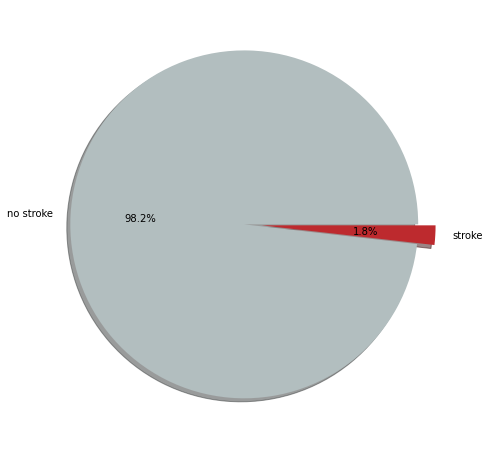

In [6]:
pie_df=pd.DataFrame(heart_stroke.groupby('Stroke')['Stroke'].count()) #Checking the percentages of stroke and no-stroke 
plt.figure(figsize=(8,8))
pie_df
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['Stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
plt.show()

In [7]:
from sklearn.impute import KNNImputer
imputer_int=KNNImputer(missing_values=np.nan,n_neighbors=5,weights='uniform',metric='nan_euclidean',copy=True,add_indicator=False)
heart_stroke['BMI']=imputer_int.fit_transform(heart_stroke[['BMI']])
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [8]:
from sklearn.impute import SimpleImputer
imputer_str=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
heart_stroke['Smoking_Status']=imputer_str.fit_transform(heart_stroke[['Smoking_Status']])
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [9]:
heart_stroke.isnull().sum()

ID                   0
Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
dtype: int64

In [10]:
heart_stroke['Age']=heart_stroke['Age'].astype(int)
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [11]:
heart_stroke['Gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: Gender, dtype: int64

In [12]:
heart_stroke['Ever_Married'].value_counts()

Yes    27938
No     15462
Name: Ever_Married, dtype: int64

In [13]:
heart_stroke['Work_Type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: Work_Type, dtype: int64

In [14]:
heart_stroke['Residence_Type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_Type, dtype: int64

In [15]:
heart_stroke['Smoking_Status'].value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: Smoking_Status, dtype: int64

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Smoking_Status', ylabel='count'>

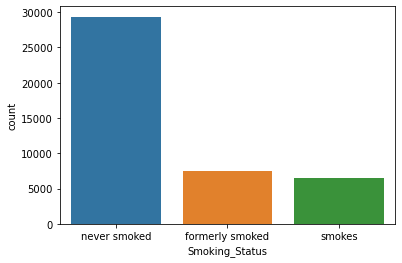

In [17]:
sns.countplot(heart_stroke["Smoking_Status"])

<AxesSubplot:xlabel='Residence_Type', ylabel='count'>

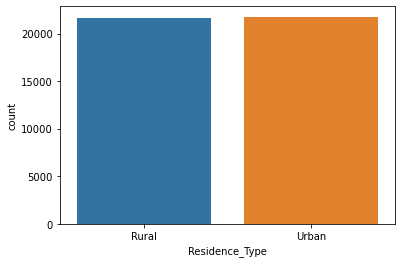

In [18]:
sns.countplot(heart_stroke["Residence_Type"])

<AxesSubplot:xlabel='Work_Type', ylabel='count'>

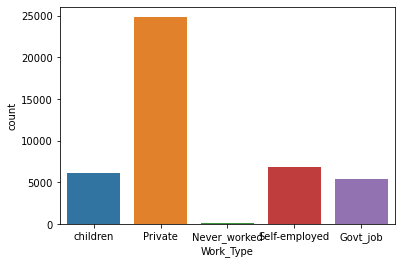

In [19]:
sns.countplot(heart_stroke["Work_Type"])

<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

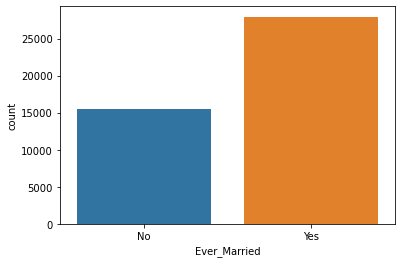

In [20]:
sns.countplot(heart_stroke["Ever_Married"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

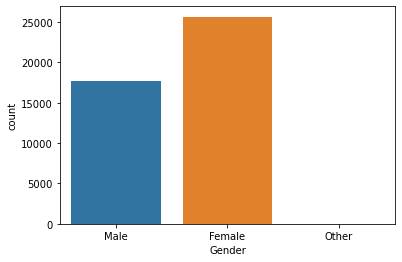

In [21]:
sns.countplot(heart_stroke["Gender"])

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
heart_stroke['Gender']=le.fit_transform(heart_stroke[['Gender']])
heart_stroke['Work_Type']=le.fit_transform(heart_stroke[['Work_Type']])
heart_stroke['Smoking_Status']=le.fit_transform(heart_stroke[['Smoking_Status']])
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,1,3,0,0,No,4,Rural,95.12,18.0,1,0
1,30468,1,58,1,0,Yes,2,Urban,87.96,39.2,1,0
2,16523,0,8,0,0,No,2,Urban,110.89,17.6,1,0
3,56543,0,70,0,0,Yes,2,Rural,69.04,35.9,0,0
4,46136,1,14,0,0,No,1,Rural,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10,0,0,No,4,Urban,58.64,20.4,1,0
43396,5450,0,56,0,0,Yes,0,Urban,213.61,55.4,0,0
43397,28375,0,82,1,0,Yes,2,Urban,91.94,28.9,0,0
43398,27973,1,40,0,0,Yes,2,Urban,99.16,33.2,1,0


In [23]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
heart_stroke['Ever_Married']=lb.fit_transform(heart_stroke[['Ever_Married']])
heart_stroke['Residence_Type']=lb.fit_transform(heart_stroke[['Residence_Type']])
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,1,3,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14,0,0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10,0,0,0,4,1,58.64,20.4,1,0
43396,5450,0,56,0,0,1,0,1,213.61,55.4,0,0
43397,28375,0,82,1,0,1,2,1,91.94,28.9,0,0
43398,27973,1,40,0,0,1,2,1,99.16,33.2,1,0


In [24]:
heart_stroke.corr().style.background_gradient(cmap='GnBu')

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
ID,1.000000,0.001657,0.012740,0.006571,0.009234,0.010217,-0.010052,0.000120,0.024634,0.018382,0.002921,0.002976
Gender,0.001657,1.000000,-0.027995,0.023709,0.082061,-0.031351,0.063739,0.001508,0.035465,-0.021570,-0.009824,0.011198
Age,0.012740,-0.027995,1.000000,0.272067,0.250054,0.693110,-0.367224,0.001284,0.237539,0.352622,-0.112074,0.155961
Hypertension,0.006571,0.023709,0.272067,1.000000,0.119777,0.176575,-0.060800,-0.003124,0.160211,0.153779,-0.030731,0.075332
Heart_Disease,0.009234,0.082061,0.250054,0.119777,1.000000,0.128833,-0.021835,-0.002743,0.146938,0.054133,-0.033478,0.113763
Ever_Married,0.010217,-0.031351,0.693110,0.176575,0.128833,1.000000,-0.359848,0.004422,0.153607,0.337517,-0.048284,0.071920
Work_Type,-0.010052,0.063739,-0.367224,-0.060800,-0.021835,-0.359848,1.000000,-0.003473,-0.059303,-0.318601,-0.012727,-0.010800
Residence_Type,0.000120,0.001508,0.001284,-0.003124,-0.002743,0.004422,-0.003473,1.000000,0.000014,-0.003685,0.008323,0.002247
Avg_Glucose_Level,0.024634,0.035465,0.237539,0.160211,0.146938,0.153607,-0.059303,0.000014,1.000000,0.184199,-0.033584,0.078917
BMI,0.018382,-0.021570,0.352622,0.153779,0.054133,0.337517,-0.318601,-0.003685,0.184199,1.000000,-0.034339,0.018407


In [27]:
heart_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  int32  
 2   Age                43400 non-null  int32  
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  int32  
 6   Work_Type          43400 non-null  int32  
 7   Residence_Type     43400 non-null  int32  
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                43400 non-null  float64
 10  Smoking_Status     43400 non-null  int32  
 11  Stroke             43400 non-null  int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 3.0 MB


In [25]:
heart_stroke.describe()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,0.408894,42.205092,0.093571,0.047512,0.643733,2.185438,0.501290,104.482750,28.605038,0.978548,0.018041
std,21072.134879,0.492151,22.543159,0.291235,0.212733,0.478901,1.093158,0.500004,43.111751,7.638023,0.568678,0.133103
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,18038.500000,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,1.000000,0.000000
50%,36351.500000,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,28.100000,1.000000,0.000000
75%,54514.250000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,72943.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [26]:
heart_stroke

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,1,3,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14,0,0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10,0,0,0,4,1,58.64,20.4,1,0
43396,5450,0,56,0,0,1,0,1,213.61,55.4,0,0
43397,28375,0,82,1,0,1,2,1,91.94,28.9,0,0
43398,27973,1,40,0,0,1,2,1,99.16,33.2,1,0


In [28]:
Indepvar=[]
for col in heart_stroke.columns:
    if col != 'Stroke':
        Indepvar.append(col)
Targetvar='Stroke'
x=heart_stroke[Indepvar]
y=heart_stroke[Targetvar]

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(49009, 11)
(49009,)


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34306, 11), (14703, 11), (34306,), (14703,))

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [32]:
brain_stroke_Results = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\AIML\HTResults.csv", header=0)
brain_stroke_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  294  1633]
 [  277 12499]]
Outcome values : 
 294 1633 277 12499
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.15      0.24      1927
           0       0.88      0.98      0.93     12776

    accuracy                           0.87     14703
   macro avg       0.70      0.57      0.58     14703
weighted avg       0.84      0.87      0.84     14703

Accuracy : 87.0 %
Precision : 51.5 %
Recall : 15.3 %
F1 Score : 0.235
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 56.6 %
MCC : 0.229
roc_auc_score: 0.565


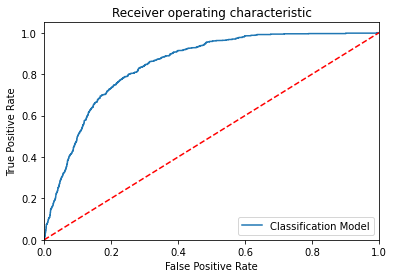

Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1369   558]
 [  364 12412]]
Outcome values : 
 1369 558 364 12412
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.71      0.75      1927
           0       0.96      0.97      0.96     12776

    accuracy                           0.94     14703
   macro avg       0.87      0.84      0.86     14703
weighted avg       0.94      0.94      0.94     14703

Accuracy : 93.7 %
Precision : 79.0 %
Recall : 71.0 %
F1 Score : 0.748
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 84.1 %
MCC : 0.714
roc_auc_score: 0.841


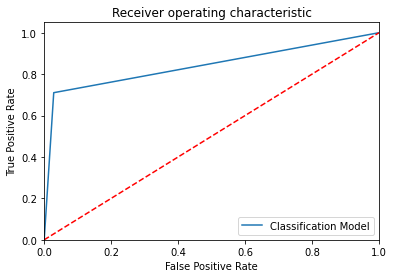

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1833    94]
 [   13 12763]]
Outcome values : 
 1833 94 13 12763
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.95      0.97      1927
           0       0.99      1.00      1.00     12776

    accuracy                           0.99     14703
   macro avg       0.99      0.98      0.98     14703
weighted avg       0.99      0.99      0.99     14703

Accuracy : 99.3 %
Precision : 99.3 %
Recall : 95.1 %
F1 Score : 0.972
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 97.5 %
MCC : 0.968
roc_auc_score: 0.975


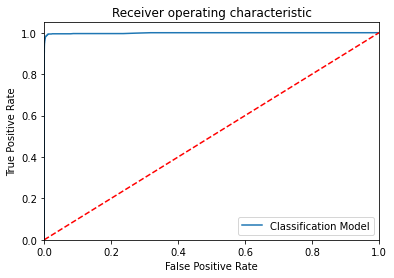

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1917    10]
 [   11 12765]]
Outcome values : 
 1917 10 11 12765
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1927
           0       1.00      1.00      1.00     12776

    accuracy                           1.00     14703
   macro avg       1.00      1.00      1.00     14703
weighted avg       1.00      1.00      1.00     14703

Accuracy : 99.9 %
Precision : 99.4 %
Recall : 99.5 %
F1 Score : 0.995
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 99.7 %
MCC : 0.994
roc_auc_score: 0.997


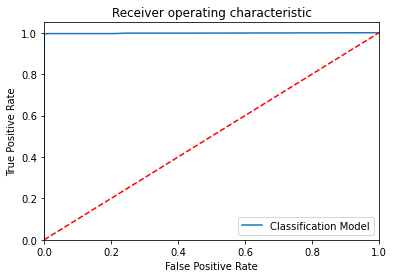

Model Name:  GaussianNB()
Confusion matrix : 
 [[  937   990]
 [ 1716 11060]]
Outcome values : 
 937 990 1716 11060
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.49      0.41      1927
           0       0.92      0.87      0.89     12776

    accuracy                           0.82     14703
   macro avg       0.64      0.68      0.65     14703
weighted avg       0.84      0.82      0.83     14703

Accuracy : 81.6 %
Precision : 35.3 %
Recall : 48.6 %
F1 Score : 0.409
Specificity or True Negative Rate : 86.6 %
Balanced Accuracy : 67.6 %
MCC : 0.309
roc_auc_score: 0.676


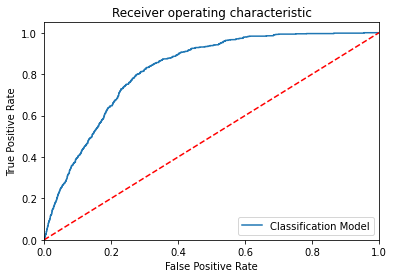

Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1811   116]
 [  877 11899]]
Outcome values : 
 1811 116 877 11899
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.94      0.78      1927
           0       0.99      0.93      0.96     12776

    accuracy                           0.93     14703
   macro avg       0.83      0.94      0.87     14703
weighted avg       0.95      0.93      0.94     14703

Accuracy : 93.2 %
Precision : 67.4 %
Recall : 94.0 %
F1 Score : 0.785
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 93.6 %
MCC : 0.761
roc_auc_score: 0.936


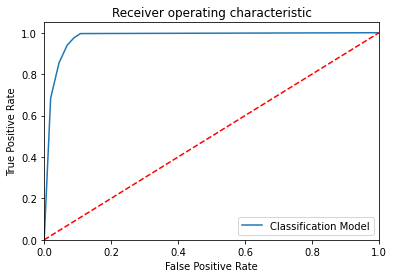

Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[  174  1753]
 [  166 12610]]
Outcome values : 
 174 1753 166 12610
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.09      0.15      1927
           0       0.88      0.99      0.93     12776

    accuracy                           0.87     14703
   macro avg       0.69      0.54      0.54     14703
weighted avg       0.83      0.87      0.83     14703

Accuracy : 86.9 %
Precision : 51.2 %
Recall : 9.0 %
F1 Score : 0.154
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 53.8 %
MCC : 0.174
roc_auc_score: 0.539


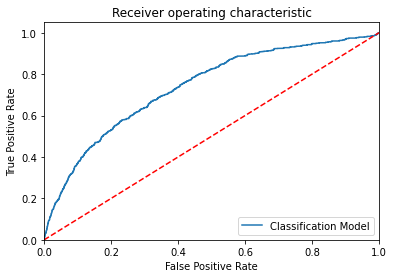

Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 1664   263]
 [ 2762 10014]]
Outcome values : 
 1664 263 2762 10014
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.86      0.52      1927
           0       0.97      0.78      0.87     12776

    accuracy                           0.79     14703
   macro avg       0.68      0.82      0.70     14703
weighted avg       0.90      0.79      0.82     14703

Accuracy : 79.4 %
Precision : 37.6 %
Recall : 86.4 %
F1 Score : 0.524
Specificity or True Negative Rate : 78.4 %
Balanced Accuracy : 82.4 %
MCC : 0.476
roc_auc_score: 0.824


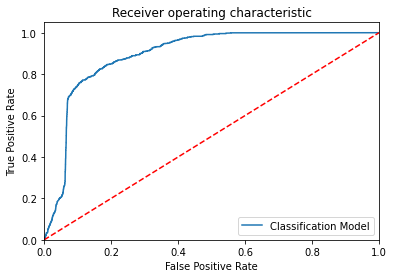

Model Name:  LGBMClassifier()
Confusion matrix : 
 [[  699  1228]
 [  139 12637]]
Outcome values : 
 699 1228 139 12637
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.36      0.51      1927
           0       0.91      0.99      0.95     12776

    accuracy                           0.91     14703
   macro avg       0.87      0.68      0.73     14703
weighted avg       0.90      0.91      0.89     14703

Accuracy : 90.7 %
Precision : 83.4 %
Recall : 36.3 %
F1 Score : 0.506
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 67.6 %
MCC : 0.512
roc_auc_score: 0.676


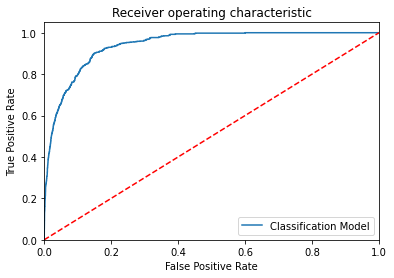

Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[  362  1565]
 [  171 12605]]
Outcome values : 
 362 1565 171 12605
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.19      0.29      1927
           0       0.89      0.99      0.94

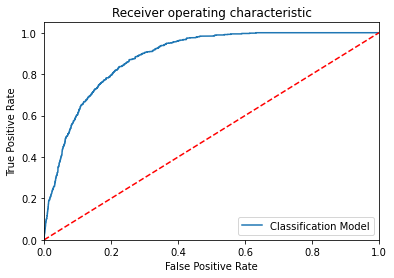

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier


# Build the model

ModelLGB = lgb.LGBMClassifier()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET=ExtraTreesClassifier()
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
heartdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)
heartdataSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight=
'balanced', probability=True)

MM = [ModelLR, ModelDC, ModelRF,ModelET,modelGNB,ModelKNN,heartdataSVMPoly,heartdataSVMGaussian,ModelLGB,ModelXGB]
for models in MM:
    
    models.fit(x_train, y_train)
    
    y_pred = models.predict(x_test)
    
    print('Model Name: ', models)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    actual = y_test

    predicted = y_pred

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

 

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

  

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)



    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);



    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    

    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    brain_stroke_Results = brain_stroke_Results.append(new_row, ignore_index=True)

In [37]:
brain_stroke_Results.to_csv(r"C:\Users\kisho\OneDrive\Desktop\AIML\BSResults_37.csv")

brain_stroke_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),294,1633,277,12499,0.870,0.515,0.153,0.235,0.978,0.229,0.565444,0.566
1,DecisionTreeClassifier(),1369,558,364,12412,0.937,0.790,0.710,0.748,0.972,0.714,0.840970,0.841
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1833,94,13,12763,0.993,0.993,0.951,0.972,0.999,0.968,0.975101,0.975
3,"(ExtraTreeClassifier(random_state=502168593), ...",1917,10,11,12765,0.999,0.994,0.995,0.995,0.999,0.994,0.996975,0.997
4,GaussianNB(),937,990,1716,11060,0.816,0.353,0.486,0.409,0.866,0.309,0.675967,0.676
5,KNeighborsClassifier(),1811,116,877,11899,0.932,0.674,0.940,0.785,0.931,0.761,0.935579,0.936
6,"SVC(degree=2, kernel='poly', probability=True)",174,1753,166,12610,0.869,0.512,0.090,0.154,0.987,0.174,0.538651,0.538
7,"SVC(class_weight='balanced', probability=True,...",1664,263,2762,10014,0.794,0.376,0.864,0.524,0.784,0.476,0.823666,0.824
8,LGBMClassifier(),699,1228,139,12637,0.907,0.834,0.363,0.506,0.989,0.512,0.675930,0.676
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",362,1565,171,12605,0.882,0.679,0.188,0.294,0.987,0.315,0.587236,0.588


In [38]:
# Results

PredResults = pd.DataFrame({'stroke_A':y_test, 'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = heart_stroke_bk.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(10)

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,stroke_A,stroke_P
4130,6118,Male,59.0,0,0,Yes,Private,Urban,86.23,30.0,formerly smoked,1,1,0
34226,20122,Male,43.0,1,0,Yes,Private,Urban,192.35,20.2,smokes,0,0,0
8247,31490,Female,39.0,0,0,Yes,Private,Urban,81.41,37.5,never smoked,0,0,0
1968,32252,Female,19.0,0,0,No,Private,Rural,72.52,32.0,NaN,0,0,0
6926,22660,Female,32.0,0,0,No,Private,Urban,89.70,31.5,never smoked,0,0,0
35482,64716,Male,12.0,0,0,No,children,Rural,83.50,24.4,never smoked,0,0,0
5181,48375,Female,25.0,0,0,No,Private,Urban,76.92,25.7,formerly smoked,0,0,0
15107,27083,Female,29.0,0,0,No,Private,Rural,103.74,19.6,smokes,0,0,0
2322,4174,Female,45.0,1,0,Yes,Private,Urban,93.21,43.8,never smoked,0,0,0
26433,39160,Female,51.0,0,0,Yes,Govt_job,Urban,66.58,40.6,smokes,0,0,0


In [33]:
brain_stroke_Results_2 = pd.read_csv(r"C:\Users\kisho\OneDrive\Desktop\AIML\EMResults_22.csv", header=0)
brain_stroke_Results_2.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Hyperparameter tuning with RandomizedSearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [36]:
ModelET = ExtraTreesClassifier()
ModelET_randomcv=RandomizedSearchCV(estimator=ModelET, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
ModelET_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [37]:
ModelET_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

Confusion matrix : 
 [[ 1606   321]
 [   27 12749]]
Outcome values : 
 1606 321 27 12749
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.83      0.90      1927
           0       0.98      1.00      0.99     12776

    accuracy                           0.98     14703
   macro avg       0.98      0.92      0.94     14703
weighted avg       0.98      0.98      0.98     14703

Accuracy : 97.6 %
Precision : 98.3 %
Recall : 83.3 %
F1 Score : 0.902
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 91.6 %
MCC : 0.893
roc_auc_score: 0.916


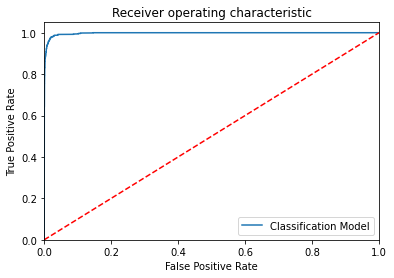

-----------------------------------------------------------------------------------------------------


In [38]:
from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=200, criterion='entropy', max_depth=450, min_samples_split=14, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
brain_stroke_Results_2 = brain_stroke_Results_2.append(new_row, ignore_index=True)

# AMONG 10 BEST ALOGORITM...IS...EXTRA TREES CLASSIFIER

Confusion matrix : 
 [[ 1917    10]
 [   13 12763]]
Outcome values : 
 1917 10 13 12763
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1927
           0       1.00      1.00      1.00     12776

    accuracy                           1.00     14703
   macro avg       1.00      1.00      1.00     14703
weighted avg       1.00      1.00      1.00     14703

Accuracy : 99.8 %
Precision : 99.3 %
Recall : 99.5 %
F1 Score : 0.994
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 99.7 %
MCC : 0.993
roc_auc_score: 0.997


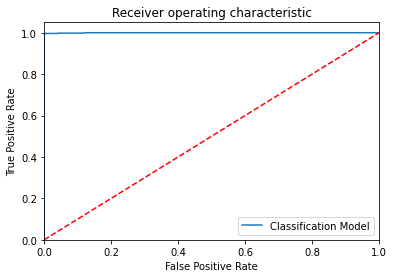

-----------------------------------------------------------------------------------------------------


In [40]:
# To build the 'ExtraTreesClassifier' model with random sampling along with default hyper parameters values

from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
brain_stroke_Results_2 = brain_stroke_Results_2.append(new_row, ignore_index=True)

In [36]:
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [34]:
predictions = model.predict(x_test)

Classificatio report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12776
           1       1.00      0.99      0.99      1927

    accuracy                           1.00     14703
   macro avg       1.00      1.00      1.00     14703
weighted avg       1.00      1.00      1.00     14703

********
Accuracy with ExtraTreesClassifier :  0.998639733387744
********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12776
           1       1.00      0.99      0.99      1927

    accuracy                           1.00     14703
   macro avg       1.00      1.00      1.00     14703
weighted avg       1.00      1.00      1.00     14703



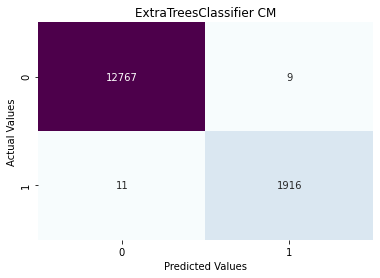

The confusion matrix [[12767     9]
 [   11  1916]]


In [37]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print('Classificatio report',classification_report(y_test,predictions))
print('********')

print('Accuracy with ExtraTreesClassifier : ',accuracy_score(y_test,predictions))
print('********')

print('The confusion matrix',my_confusion_matrix(y_test,predictions,'ExtraTreesClassifier CM'))